**EDA** Exploratory Data Analysis refers to the critical process of performing initial investigations on data to discover patterns, spot anomalies, test hypotheses and check assumptions with the help of summary statistics and graphical representations.

<b>Example of steps:</b> visualize variables, distribution of key attributes, relations between attributes, properties of significant sub-populations, simple statistical analyses.

# Leaning Objectives
### In this module, we will cover:
<ul>
    <li> Overall to get to know about the underlying data and gather as many insights from it. </li>
    <li> Learn the Pivot Table presentation with Python. </li>
    <li> Learn univariate visualization of each field in the raw dataset, with summary statistics. </li>    <li> Use Bivariate visualizations to assess the relationshie in the datase. </li>
    <li> Multivariate visualizations, for mapping and understanding interactions between different fields in the data. </li>
</ul>

### Read the cleaned data files into DataFrame

>`pandas.read_csv()`

We will load the earlier exported CSV data from "Data Manipulation with Pandas" (Stage I).
                                                                               
**Singapore Resale HDB Housing Price public dataset 2017-2022.**

In [2]:
import pandas as pd

# Read the CSV file
housing_data = pd.read_csv('House_Datasets/stage_I_housing_data.csv')

# View the first 2 rows
housing_data.head(2)

,month,town,flat_type,block,street_name,storey_range,storey_category,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,remaining_lease_numerical,resale_price
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,Low-mid rise,44.0,Improved,1979,61 years 04 months,61.333333,232000.0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,Low-rise,67.0,New Generation,1978,60 years 07 months,60.583333,250000.0


### Preparation: Assign the correct data types

The default data load may cause many types unassigned, so we need to re-assign the correct data types to the necessary columns.

The `dtype 'O'` stands for `'object'` in pandas, which typically indicates that the column contains mixed types or strings.

In [6]:
# Convert columns to appropriate types
housing_data['month'] = pd.to_datetime(housing_data['month'], format='%Y-%m-%d')  # Convert month to datetime
housing_data['floor_area_sqm'] = pd.to_numeric(housing_data['floor_area_sqm'])  # Convert floor_area_sqm to numeric
housing_data['lease_commence_date'] = housing_data['lease_commence_date'].astype(int)  # Convert lease_commence_date to numeric
housing_data['remaining_lease_numerical'] = pd.to_numeric(housing_data['remaining_lease_numerical'])  # Convert resale_price to numeric
housing_data['resale_price'] = pd.to_numeric(housing_data['resale_price'])  # Convert resale_price to numeric

# If there are categorical columns, convert them to 'category' dtype
categorical_columns = ['town', 'flat_type', 'flat_model', 'storey_range', 'storey_category', 'flat_model']
for column in categorical_columns:
    housing_data[column] = housing_data[column].astype('category')

# Define the logical order for flat types
flat_type_order = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']

# Convert the flat_type column to a categorical type with the specified order
housing_data['flat_type'] = pd.Categorical(housing_data['flat_type'], categories=flat_type_order, ordered=True)

# Convert the new column to an ordered categorical type
storey_category_order = ['Low-rise', 'Low-mid rise', 'Mid-rise', 'High-mid rise', 'High-rise']
housing_data['storey_category'] = pd.Categorical(housing_data['storey_category'], categories=storey_category_order, ordered=True)

# Check the dtypes after conversion
print(housing_data.dtypes)

month                        datetime64[ns]
town                               category
flat_type                          category
block                                object
street_name                          object
storey_range                       category
storey_category                    category
floor_area_sqm                      float64
flat_model                         category
lease_commence_date                   int32
remaining_lease                      object
remaining_lease_numerical           float64
resale_price                        float64
dtype: object


### Pivot Tables

A pivot table is a way of summarizing data in a data frame for a particular purpose. It makes heavy use of the aggregation function. A pivot table is itself a data frame, where the rows represent one variable that you're interested in, the columns another, and the cell's some aggregate value.

A pivot table also tends to includes marginal values as well, which are the sums for each column and row. This allows you to be able to see the relationship between two variables at just a glance. 

<img src="House_Datasets/pivot_table_datasheet.jpg" width="600">

<b>Examples:</b>
<blockquote>
<ol>
    <li> Average Resale Price by Town and Flat Type. </li>
    <li> Average Resale Price by Town and Storey Range. </li>
    <li> Average Resale Price by Flat Type and Lease Commencement Date. </li>
</ol>
</blockquote>

In [8]:
# 1. Average resale price by town and flat type
pivot_town_flat_type = housing_data.pivot_table(values='resale_price', index='town', columns='flat_type', aggfunc='mean')

# 2. Average resale price by town and storey range
pivot_town_storey_range = housing_data.pivot_table(values='resale_price', index='town', columns='storey_range', aggfunc='mean')

# 3. Average resale price by flat type and lease commencement date
pivot_flat_type_lease = housing_data.pivot_table(values='resale_price', index='flat_type', columns='lease_commence_date', aggfunc='mean')

# Display pivot tables
print("Average Resale Price by Town and Flat Type")
print(pivot_town_flat_type)

print("\nAverage Resale Price by Town and Storey Range")
print(pivot_town_storey_range)

print("\nAverage Resale Price by Flat Type and Lease Commencement Date")
print(pivot_flat_type_lease)

Average Resale Price by Town and Flat Type
flat_type               1 ROOM         2 ROOM         3 ROOM         4 ROOM  \
town                                                                          
ANG MO KIO                 NaN  221513.574468  312333.858940  488794.801027   
BEDOK                      NaN  231142.757576  307544.474747  457287.874949   
BISHAN                     NaN            NaN  368512.090226  571200.646870   
BUKIT BATOK                NaN            NaN  283642.430065  405251.312960   
BUKIT MERAH      193495.781818  258948.968553  392155.559016  672848.727413   
BUKIT PANJANG              NaN  255083.875000  313475.024917  416748.011454   
BUKIT TIMAH                NaN            NaN  414310.750000  634767.985401   
CENTRAL AREA               NaN  262866.700000  419068.091954  779560.357778   
CHOA CHU KANG              NaN  246107.407407  321755.331363  396360.332292   
CLEMENTI                   NaN  315087.515152  352480.159664  594138.293907   
GEYLANG  

C:\Users\21410\AppData\Local\Temp\ipykernel_2704\193367141.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_town_flat_type = housing_data.pivot_table(values='resale_price', index='town', columns='flat_type', aggfunc='mean')
C:\Users\21410\AppData\Local\Temp\ipykernel_2704\193367141.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_town_storey_range = housing_data.pivot_table(values='resale_price', index='town', columns='storey_range', aggfunc='mean')
C:\Users\21410\AppData\Local\Temp\ipykernel_2704\193367141.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specif

### Data Visualizations

<b>Suggested Steps: </b>
<ol>
    <li> Learn univariate visualization of each field in the raw dataset, with summary statistics. </li>
    <li> Use bivariate visualizations to assess the relationship in the data and correlation matrix. </li>
    <li> Multivariate visualizations, for mapping and understanding interactions between different fields in thdata. </li>
</ol>

<b> 1. Generate histograms for numerical fields and bar plots for categorical fields. </b>
<hr>
<blockquote>
    <ul>
    <li> For numerical fields, display the distribution either using histogram or boxplot, use the <code>matplotlib.pyplot</code> library. </li>
    <li> For categorical fields, plot the bar plots.</li>
    </ul>
</blockquote>

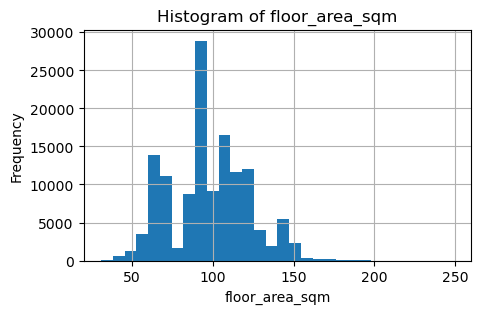

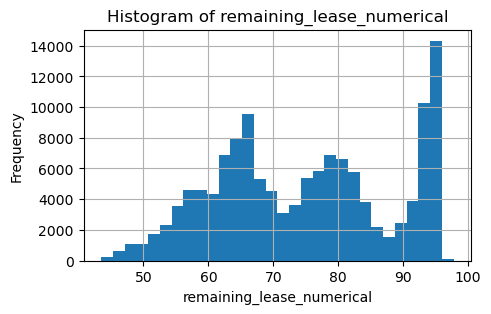

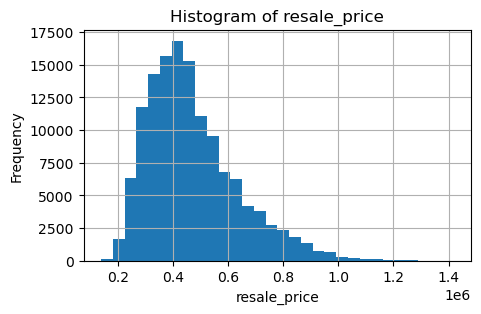

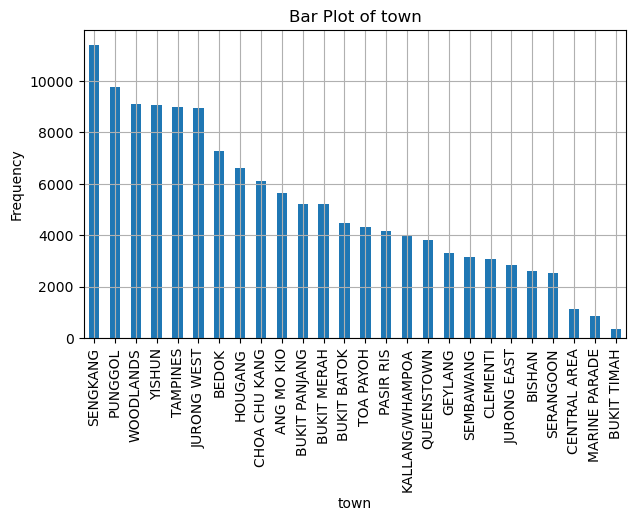

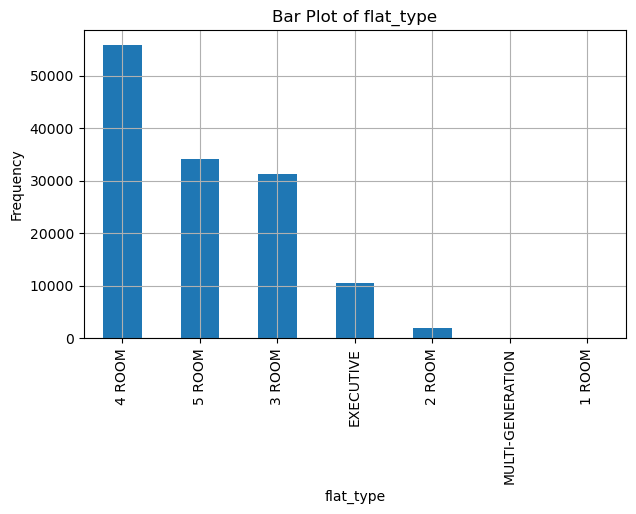

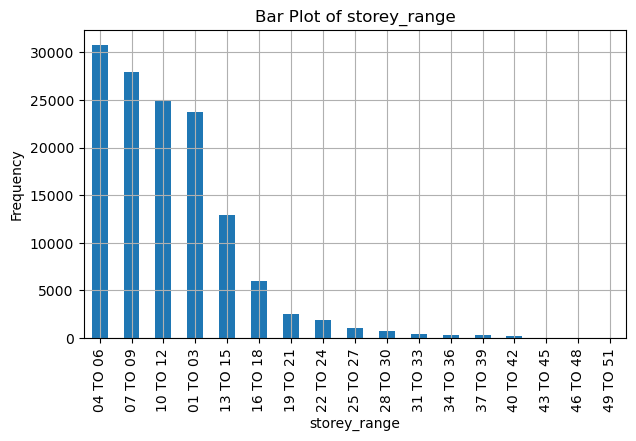

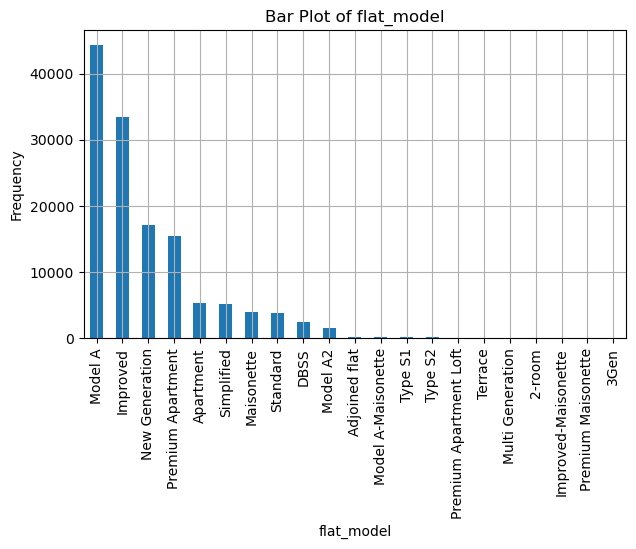

In [13]:
import matplotlib.pyplot as plt

# Plot histograms for numerical fields
numerical_fields = ['floor_area_sqm', 'remaining_lease_numerical', 'resale_price', ]
for field in numerical_fields:
    plt.figure(figsize=(5, 3))
    housing_data[field].hist(bins=30)
    plt.title(f'Histogram of {field}')
    plt.xlabel(field)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot bar plots for categorical fields
categorical_fields = ['town', 'flat_type', 'storey_range', 'flat_model']
for field in categorical_fields:
    plt.figure(figsize=(7, 4))
    housing_data[field].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {field}')
    plt.xlabel(field)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

<b> 2. Generate bivariate visualizations </b>

We would like to assess relationships between pairs of variables and compute the correlation matrix. 
<hr>
<blockquote>
    <ul>
    <li> Generate scatter plots for pairs of numerical variables to visualize relationships. </li>
    <li> Create box plots to show the relationship between numerical and categorical variables.</li>
    <li> Compute and display the correlation matrix.</li>
    </ul>
</blockquote>

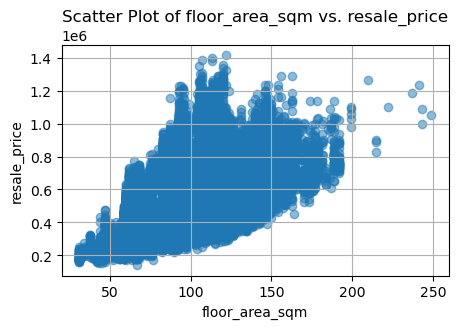

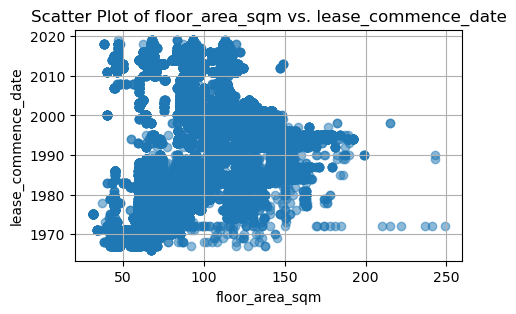

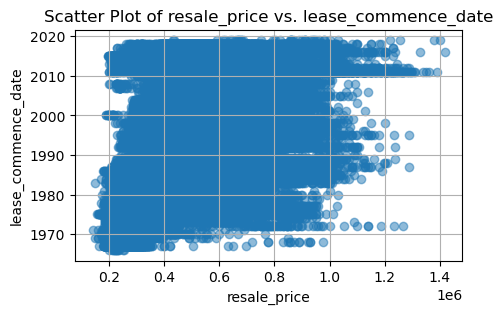

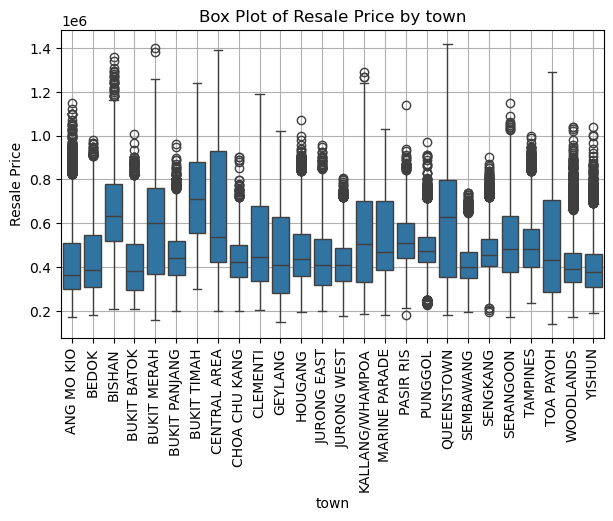

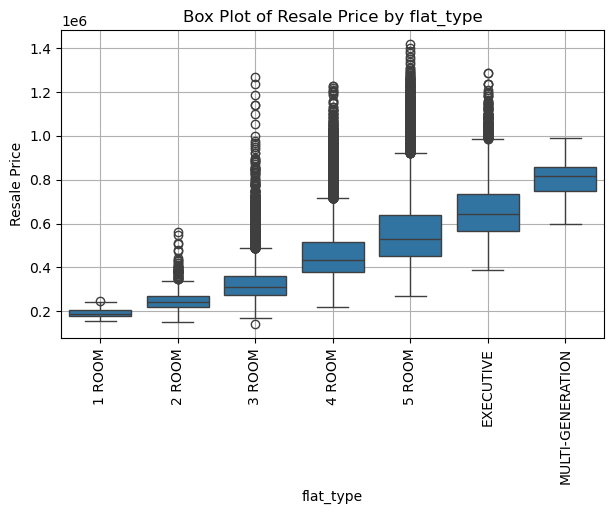

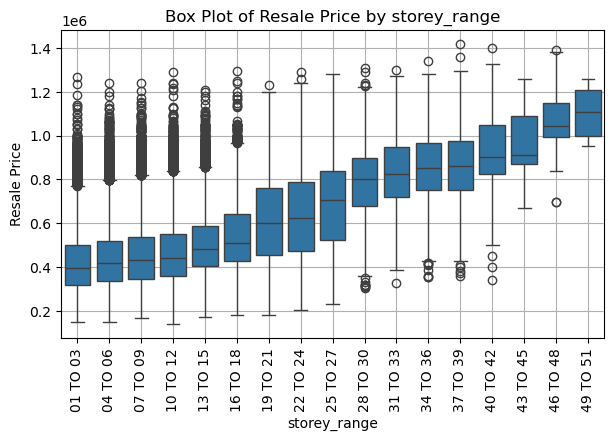

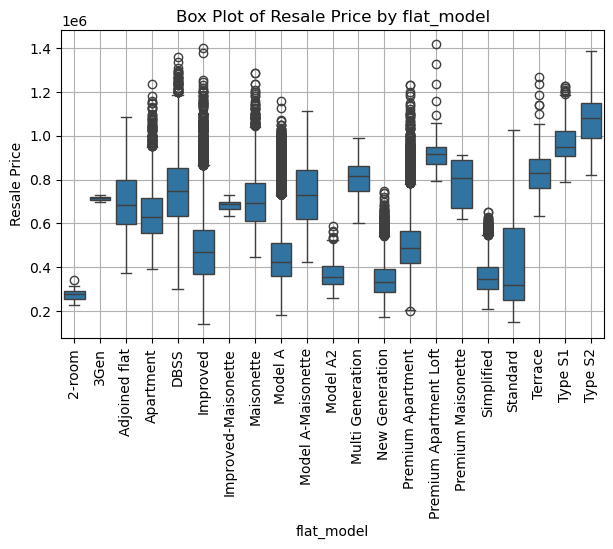

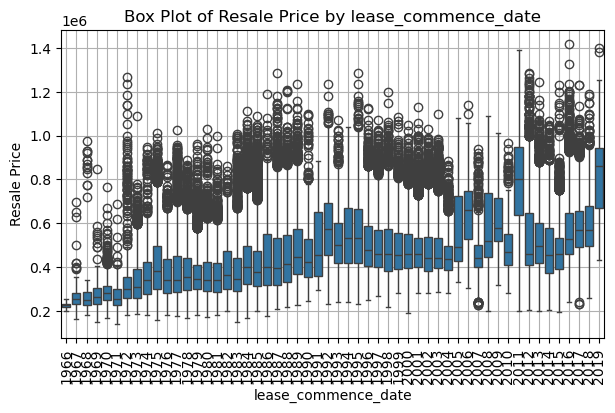

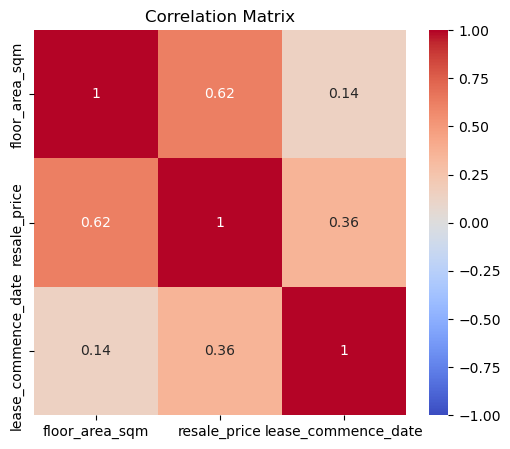

In [15]:
import seaborn as sns

# Scatter plots for pairs of numerical variables
numerical_fields = ['floor_area_sqm', 'resale_price', 'lease_commence_date']
for i in range(len(numerical_fields)):
    for j in range(i+1, len(numerical_fields)):
        plt.figure(figsize=(5, 3))
        plt.scatter(housing_data[numerical_fields[i]], housing_data[numerical_fields[j]], alpha=0.5)
        plt.title(f'Scatter Plot of {numerical_fields[i]} vs. {numerical_fields[j]}')
        plt.xlabel(numerical_fields[i])
        plt.ylabel(numerical_fields[j])
        plt.grid(True)
        plt.show()

# Box plots for numerical vs. categorical variables
categorical_fields = ['town', 'flat_type', 'storey_range', 'flat_model', 'lease_commence_date']
for cat in categorical_fields:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=cat, y='resale_price', data=housing_data)
    plt.title(f'Box Plot of Resale Price by {cat}')
    plt.xlabel(cat)
    plt.ylabel('Resale Price')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

# Correlation matrix
correlation_matrix = housing_data[['floor_area_sqm', 'resale_price', 'lease_commence_date']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

<b> 3. Generate multivariate visualizations </b>

We would like to understand more interactions between different fields in the data, e.g., any trends. 
<hr>
<blockquote>
    <ul>
    <li> Generate pair plots with categorical hue. </li>
    <li> Generate line plots for trend analysis.</li>
    </ul>
</blockquote>

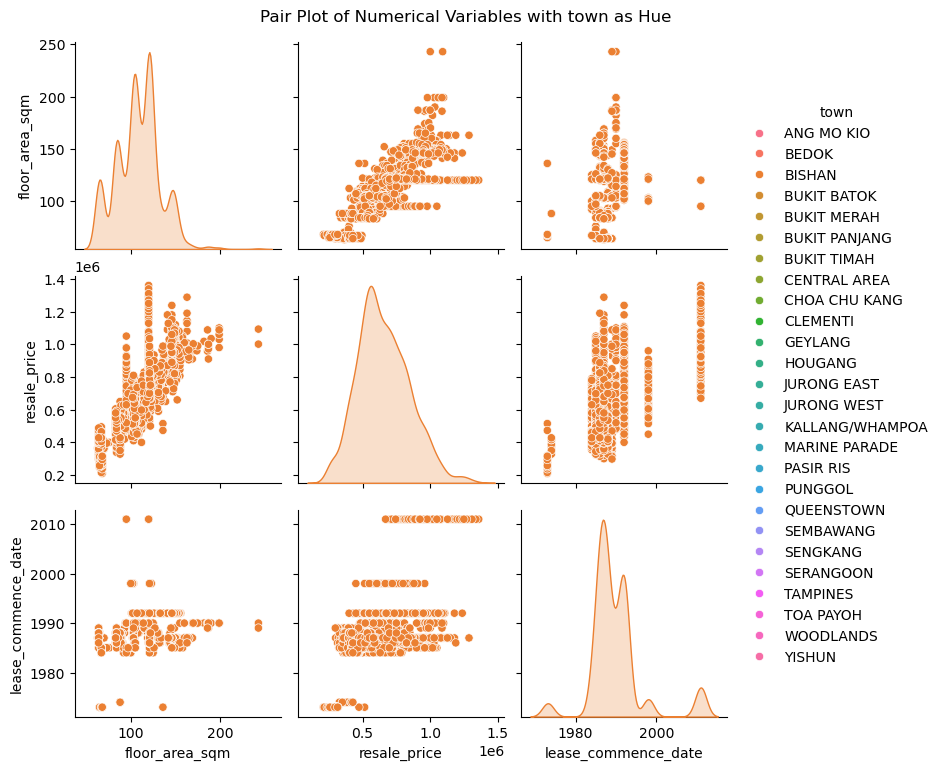

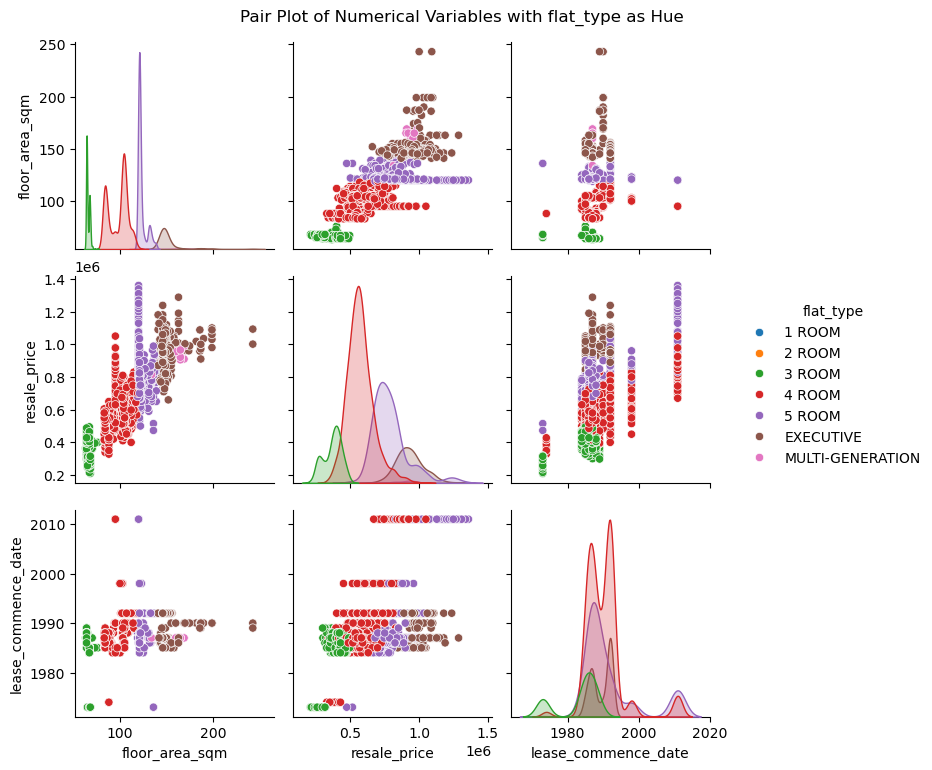

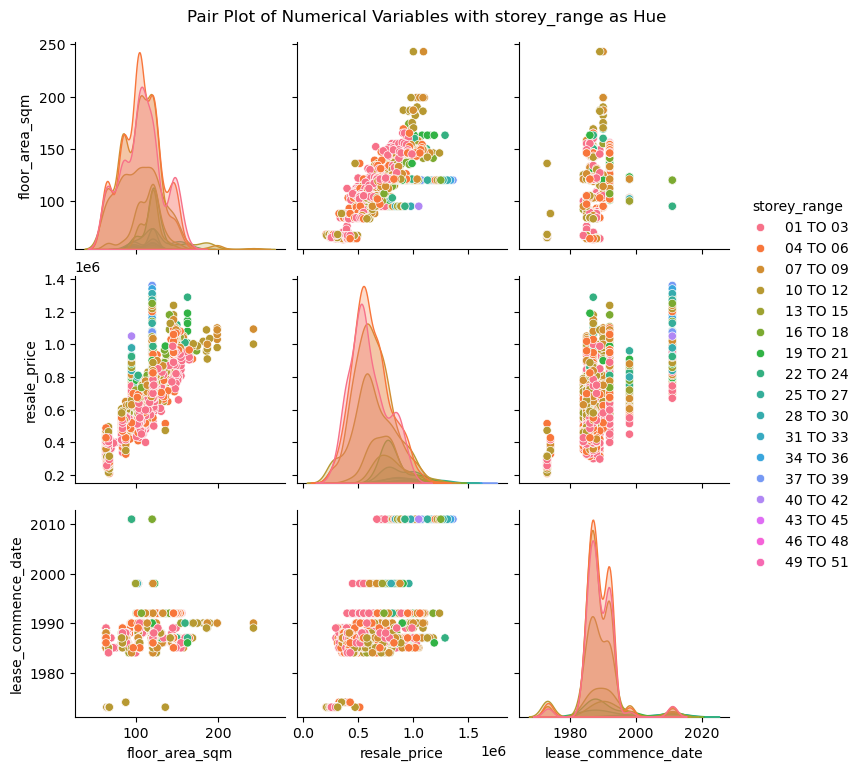

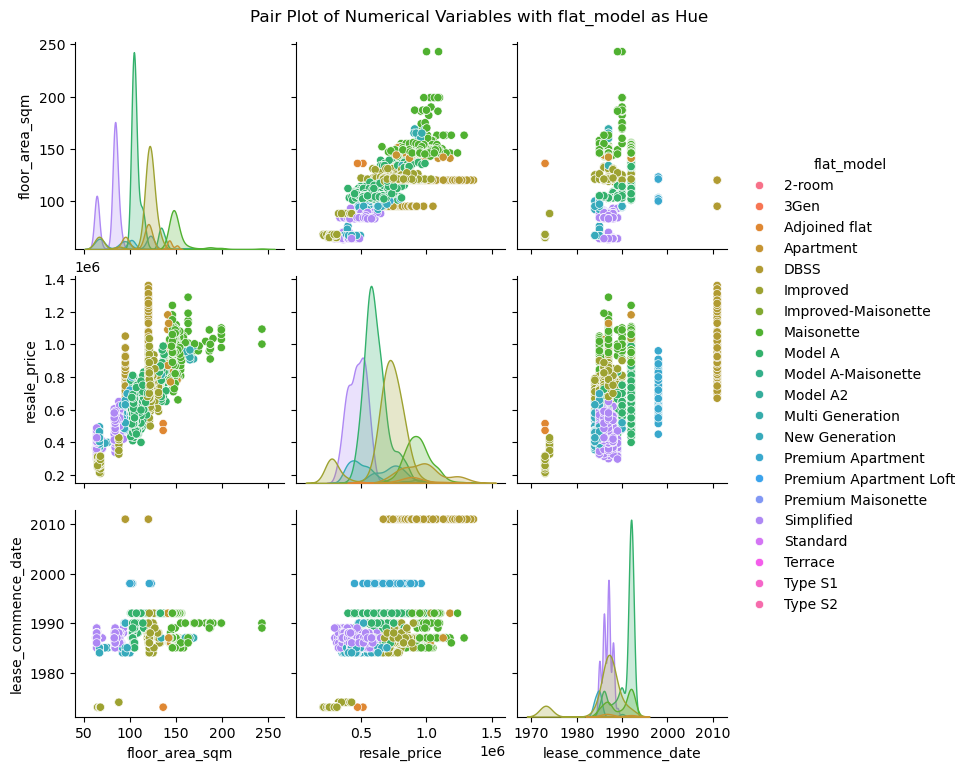

In [23]:
# Pair plots with categorical hue
categorical_fields = ['town', 'flat_type', 'storey_range', 'flat_model']

for cat in categorical_fields:
    if housing_data[cat].dtype == 'category':  # Ensure the field is categorical
        sns.pairplot(housing_data[housing_data['town'] == 'BISHAN'], vars=['floor_area_sqm', 'resale_price', 'lease_commence_date'], hue=cat)
        plt.suptitle(f'Pair Plot of Numerical Variables with {cat} as Hue', y=1.02)
        plt.show()

<b> 4. Generate time-trending line plots </b>

To analyze trends for specific flat types, we can focus on visualizing how resale prices and other relevant variables change over time for each flat type. This can include line plots showing trends in resale prices, floor area, and lease commencement dates.

<hr>
<blockquote>
    <ul>
    <li> <b>Filter Data by Flat Type</b>: Select specific flat types for analysis. </li>
    <li> <b>Trends in Resale Prices Over Time</b>: Create line plots showing the trends in resale prices for each flat type. </li>
    <li> <b>Trends in Lease Commencement Date Over Time</b>: Create line plots showing the trends in lease commencement dates for each flat type.</li>
    </ul>
</blockquote>

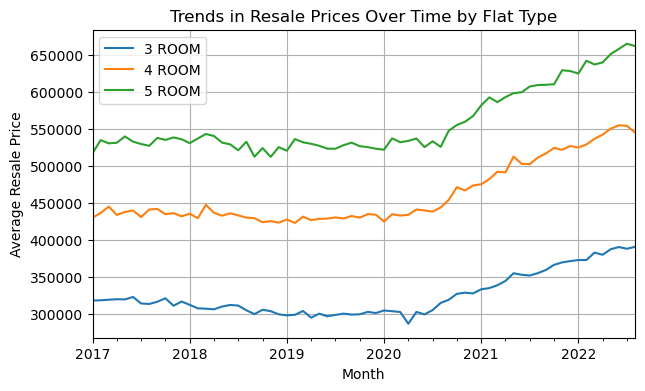

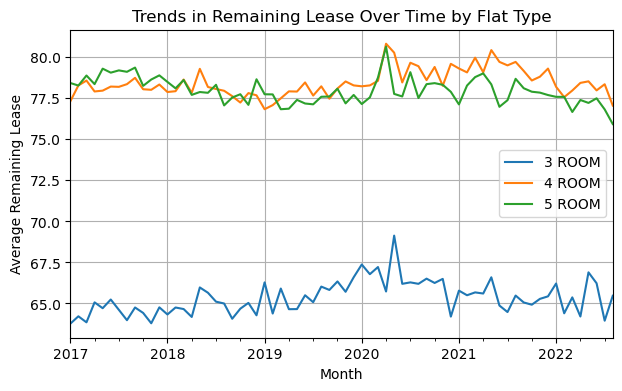

In [26]:
# Filter data by specific flat types
flat_types_of_interest = ['3 ROOM', '4 ROOM', '5 ROOM']  # Example flat types
filtered_data = housing_data[housing_data['flat_type'].isin(flat_types_of_interest)]

# Plot trends in resale prices over time for each flat type
plt.figure(figsize=(7, 4))
for flat_type in flat_types_of_interest:
    subset = filtered_data[filtered_data['flat_type'] == flat_type]
    subset.groupby('month')['resale_price'].mean().plot(label=flat_type)
plt.title('Trends in Resale Prices Over Time by Flat Type')
plt.xlabel('Month')
plt.ylabel('Average Resale Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot trends in lease commencement date over time for each flat type
plt.figure(figsize=(7, 4))
for flat_type in flat_types_of_interest:
    subset = filtered_data[filtered_data['flat_type'] == flat_type]
    subset.groupby('month')['remaining_lease_numerical'].mean().plot(label=flat_type)
plt.title('Trends in Remaining Lease Over Time by Flat Type')
plt.xlabel('Month')
plt.ylabel('Average Remaining Lease')
plt.legend()
plt.grid(True)
plt.show()